#### 교차엔트로피

In [1]:
- 1/4 * np.log2(1/2) - 1/4 * np.log2(1/4) - 1/4 * np.log2(1/8) - 1/4 * np.log2(1/8)

2.25

#### 교차엔트로피를 사용한 분류성능 측정

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [7]:
from sklearn.metrics import log_loss

log_loss(df["y"], df["y_hat"])

3.799305383311686

#### Ex. 10.3.1

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


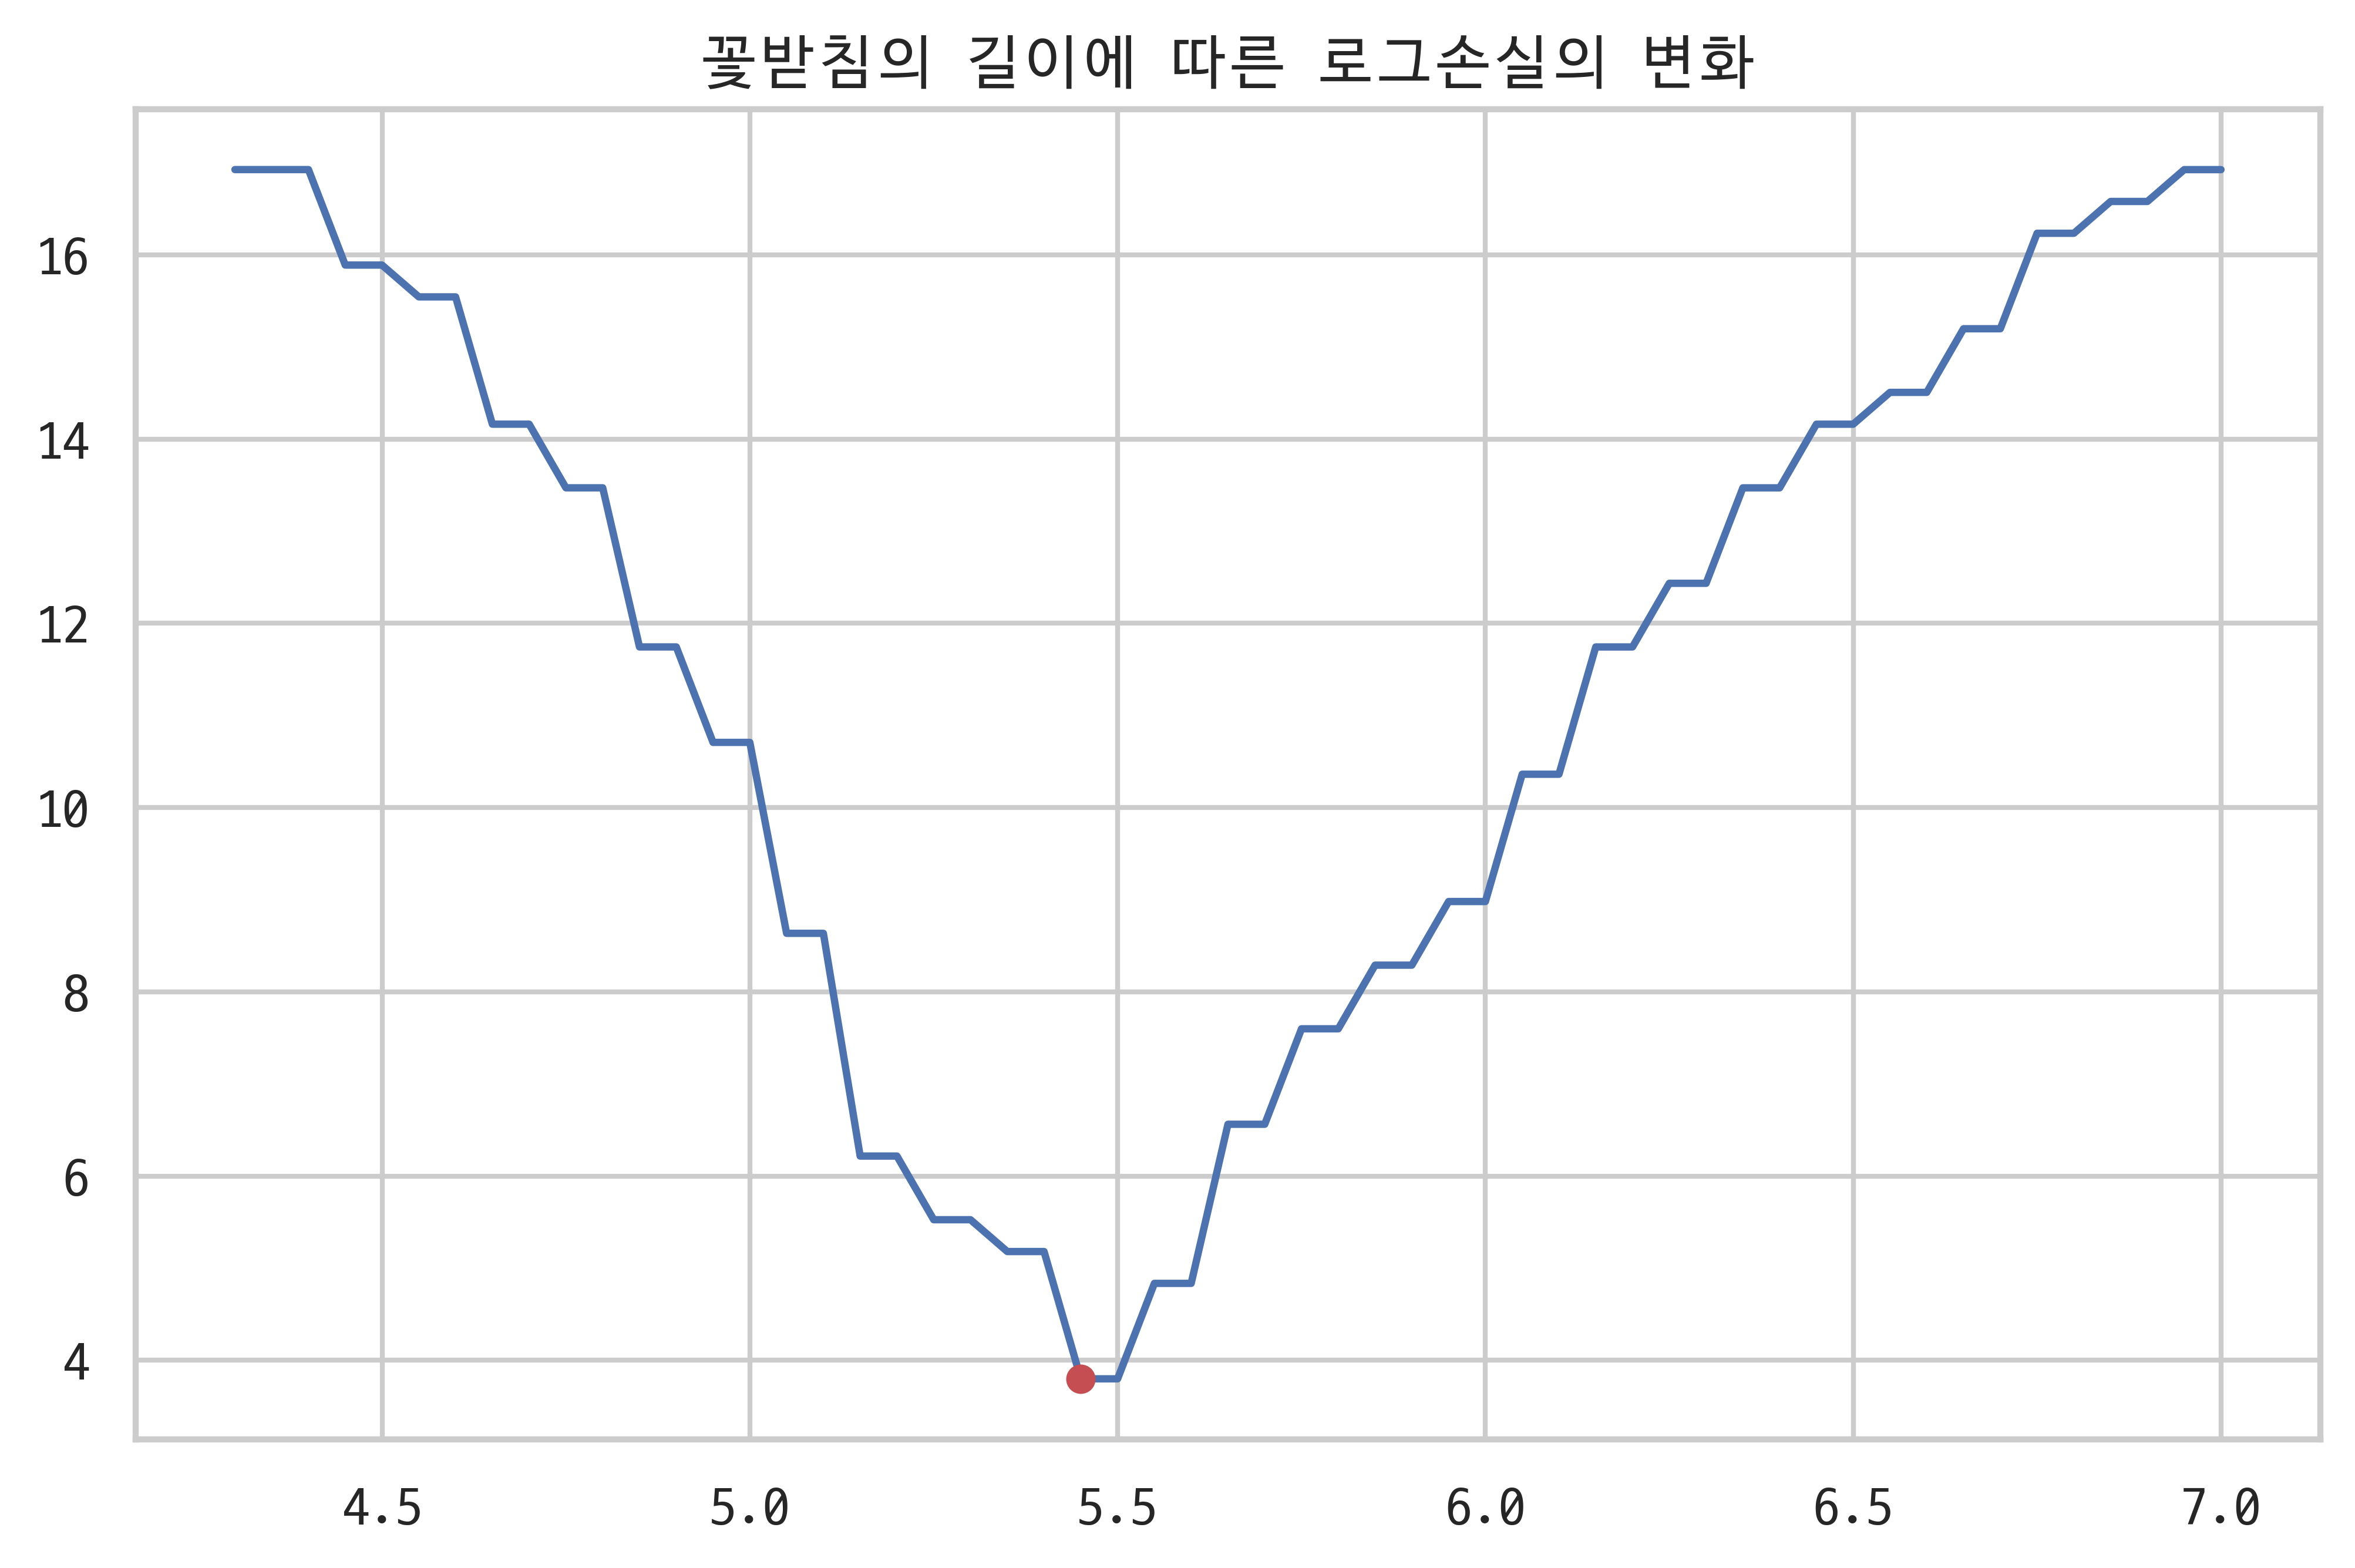

In [16]:
# (1)번 문제
sl_min_length, sl_max_length = min(df["sepal length (cm)"]), max(df["sepal length (cm)"])
sl_list = []
sl_loss_list = []

for i, l in enumerate(np.arange(sl_min_length, sl_max_length + 0.05, 0.05)):
    df["y_hat_{}".format(i)] = (df["sepal length (cm)"] > l).astype(int)
    loss = log_loss(df["y"], df["y_hat_{}".format(i)])
    sl_list.append(l)
    sl_loss_list.append(loss)

plt.plot(sl_list, sl_loss_list, ls="-")
plt.plot(5.45, min(sl_loss_list), 'ro', ms=5)
plt.title("꽃받침의 길이에 따른 로그손실의 변화")
plt.show()

In [17]:
# (2)번 문제
min(sl_loss_list)

3.799305383311686

In [15]:
list(zip(sl_list, sl_loss_list))
# answer: 5.45 cm

[(4.3, 16.92439223624703),
 (4.35, 16.92439223624703),
 (4.3999999999999995, 16.92439223624703),
 (4.449999999999999, 15.888204956476802),
 (4.499999999999999, 15.888204956476802),
 (4.549999999999999, 15.542809196553394),
 (4.599999999999999, 15.542809196553394),
 (4.649999999999999, 14.16122615685976),
 (4.699999999999998, 14.16122615685976),
 (4.749999999999998, 13.470434637012943),
 (4.799999999999998, 13.470434637012943),
 (4.849999999999998, 11.743455837395897),
 (4.899999999999998, 11.743455837395897),
 (4.9499999999999975, 10.707260561651369),
 (4.999999999999997, 10.707260561651369),
 (5.049999999999997, 8.634870010162315),
 (5.099999999999997, 8.634870010162315),
 (5.149999999999997, 6.217091694724149),
 (5.199999999999997, 6.217091694724149),
 (5.2499999999999964, 5.526292178903032),
 (5.299999999999996, 5.526292178903032),
 (5.349999999999996, 5.180896418979622),
 (5.399999999999996, 5.180896418979622),
 (5.449999999999996, 3.799305383311686),
 (5.499999999999996, 3.7993053

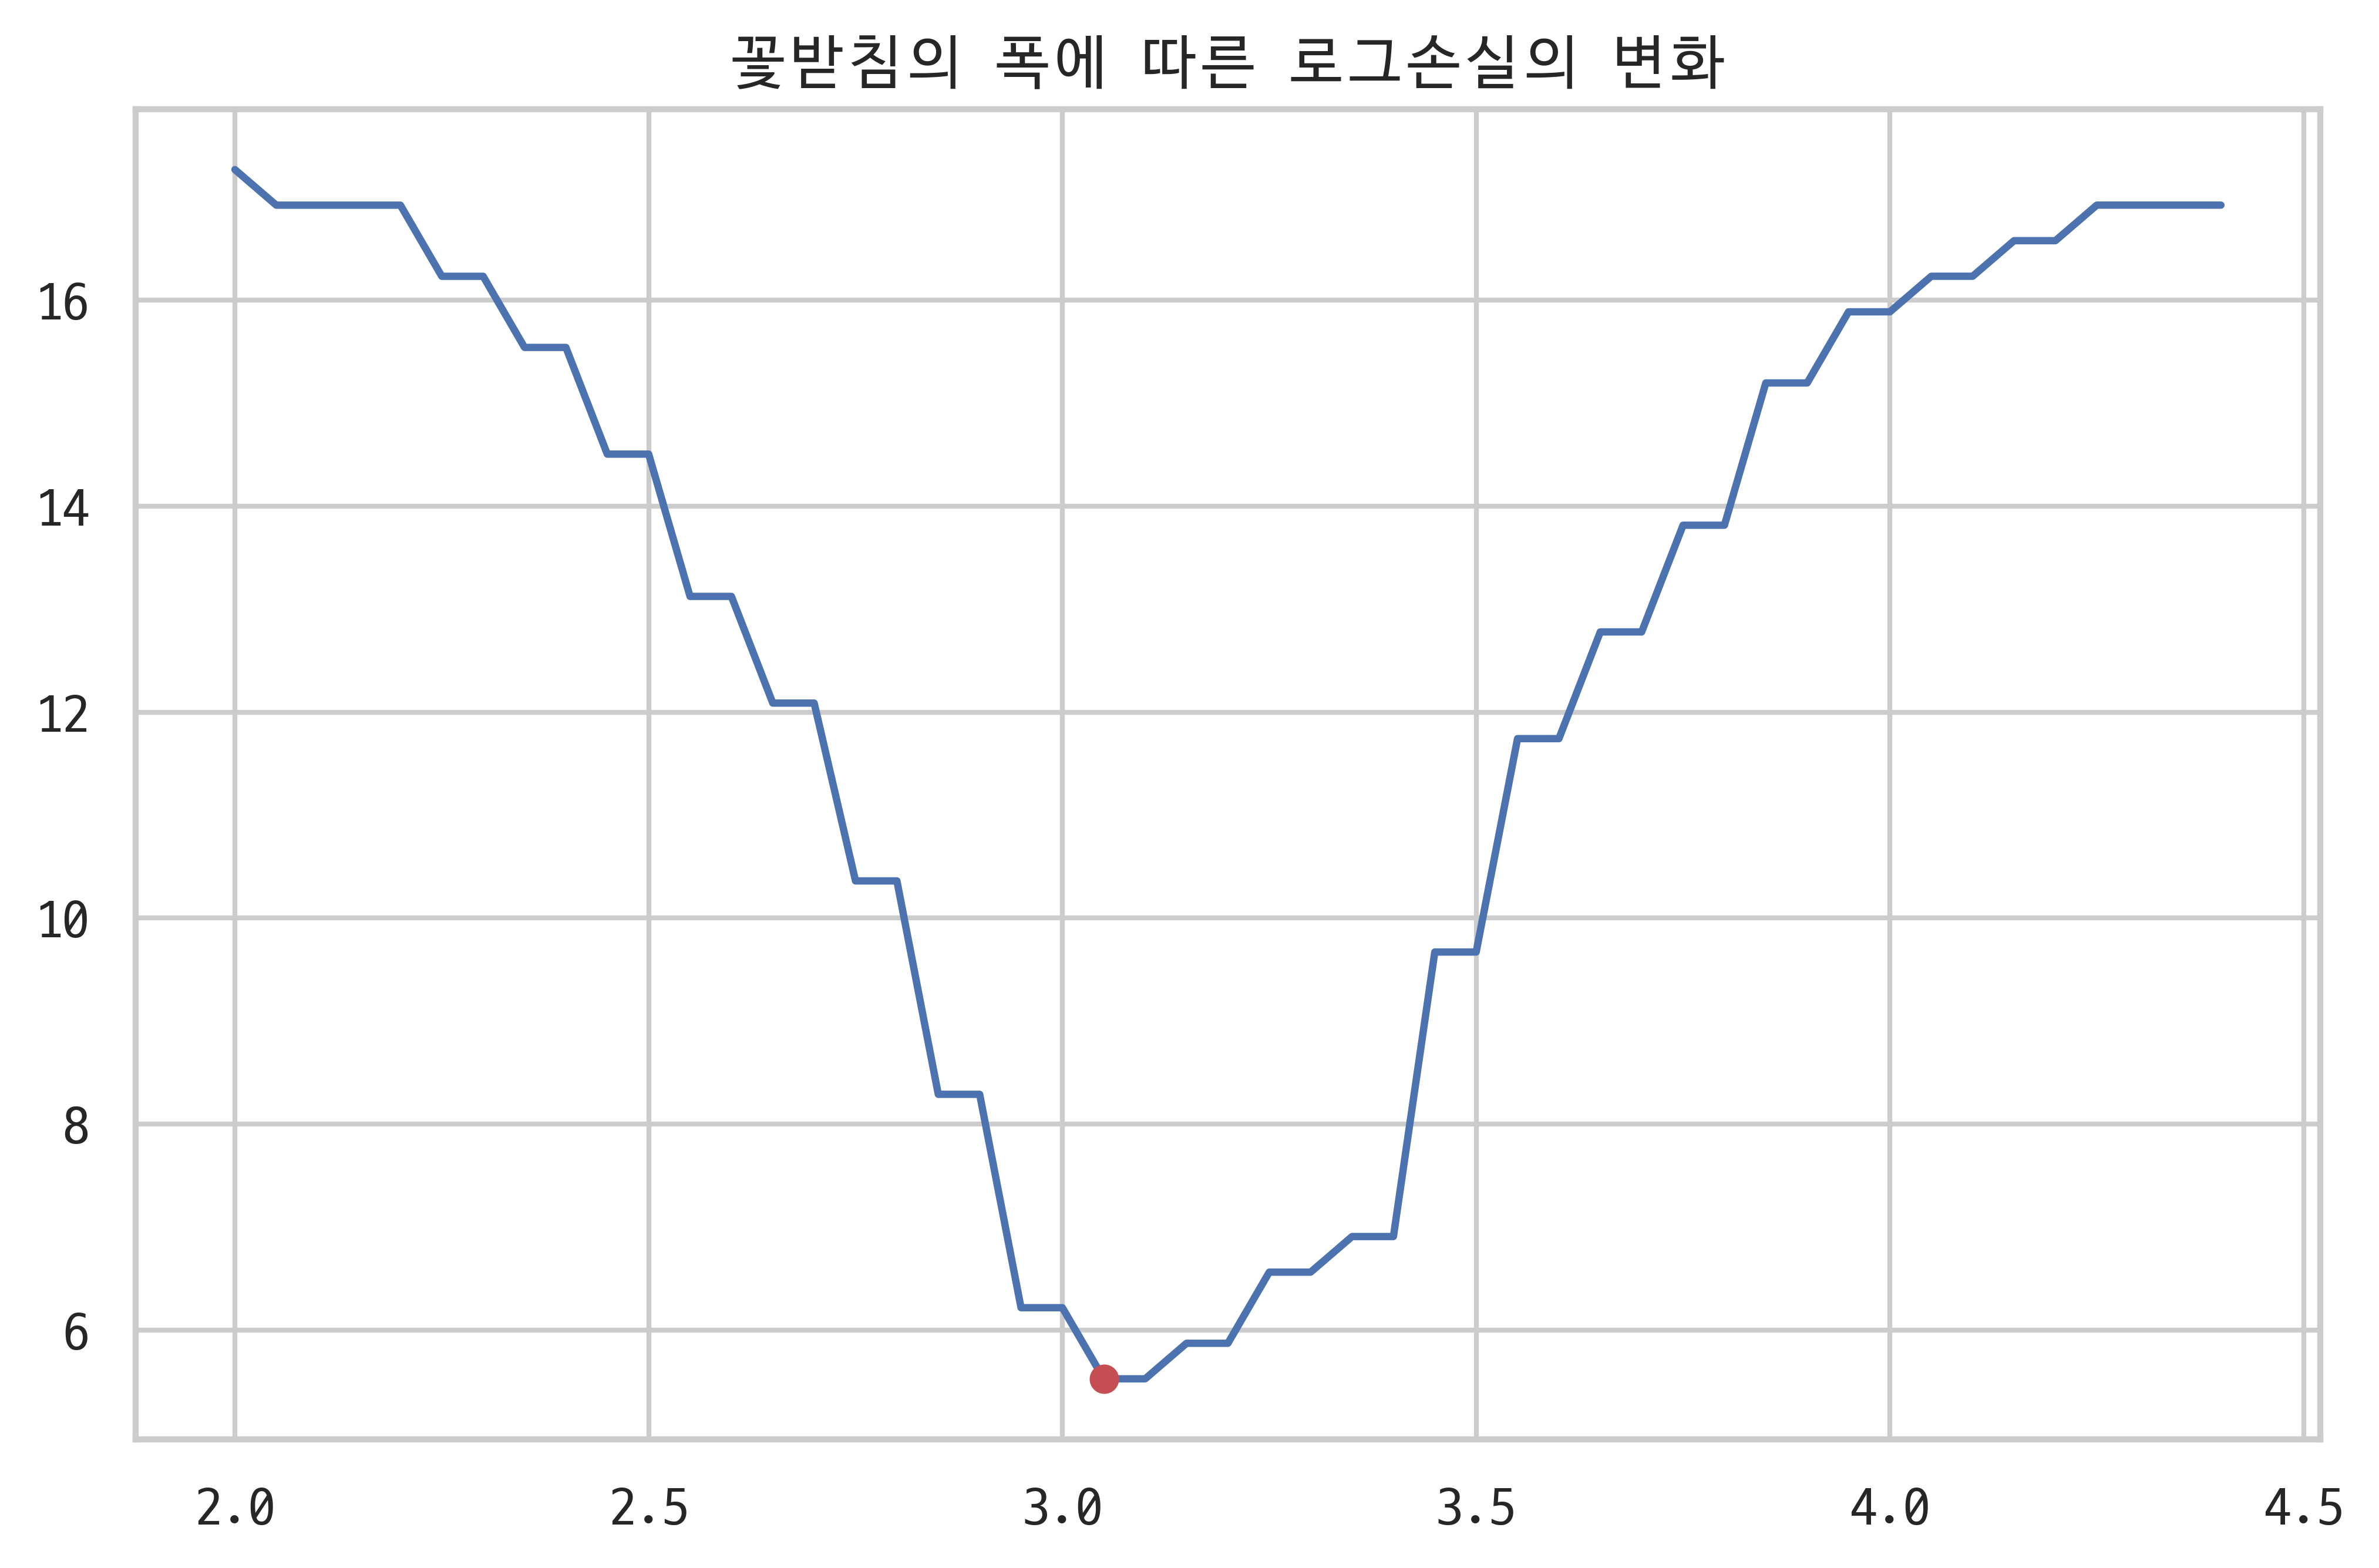

In [28]:
# (3)번 문제
sw_min_length, sw_max_length = min(df["sepal width (cm)"]), max(df["sepal width (cm)"])
sw_list = []
sw_loss_list = []

for i, l in enumerate(np.arange(sw_min_length, sw_max_length, 0.05)):
    df["y_hat_w{}".format(i)] = (df["sepal width (cm)"] < l).astype(int)
    loss = log_loss(df["y"], df["y_hat_w{}".format(i)])
    sw_list.append(l)
    sw_loss_list.append(loss)

plt.plot(sw_list, sw_loss_list, ls="-")
plt.plot(3.05, min(sw_loss_list), 'ro', ms=5)
plt.title("꽃받침의 폭에 따른 로그손실의 변화")
plt.show()

In [25]:
min(sw_loss_list)

5.526268190980124

In [27]:
list(zip(sw_list, sw_loss_list))
# answer: 3.05 cm

[(2.0, 17.269388197455342),
 (2.05, 16.924000433506237),
 (2.0999999999999996, 16.924000433506237),
 (2.1499999999999995, 16.924000433506237),
 (2.1999999999999993, 16.924000433506237),
 (2.249999999999999, 16.233224905608022),
 (2.299999999999999, 16.233224905608022),
 (2.3499999999999988, 15.542457373684108),
 (2.3999999999999986, 15.542457373684108),
 (2.4499999999999984, 14.506294081836788),
 (2.4999999999999982, 14.506294081836788),
 (2.549999999999998, 13.12474302604036),
 (2.599999999999998, 13.12474302604036),
 (2.6499999999999977, 12.08857973419304),
 (2.6999999999999975, 12.08857973419304),
 (2.7499999999999973, 10.361640914447507),
 (2.799999999999997, 10.361640914447507),
 (2.849999999999997, 8.289314330752866),
 (2.899999999999997, 8.289314330752866),
 (2.9499999999999966, 6.216995743032527),
 (2.9999999999999964, 6.216995743032527),
 (3.0499999999999963, 5.526268190980124),
 (3.099999999999996, 5.526268190980124),
 (3.149999999999996, 5.871687938826439),
 (3.1999999999999

In [29]:
# (4)번 문제
min(min(sl_loss_list), min(sw_loss_list))
# answer: 꽃받침의 길이

3.799305383311686

#### 가변길이 인코딩과 쿨백-라이블러 발산

In [30]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'ACAAAABAAAABBADBBABDAABDCAACAAAADBBABAACBAACBAAAABBBBAAABAAABDBAADACAACAADDAABABAAAABACDABABAAACABBACBADAAACDADBACACCAACDCDABBABBBDDADBDABDBBCADCCABACDADBAAABABCAAAAABCBAAAAAADBBAAAACBADABDCBAAAAACABB'

In [32]:
from collections import Counter

p = np.array(list(Counter(doc).values())) / len(doc)
p

array([0.5  , 0.125, 0.25 , 0.125])

In [41]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], base=2)

1.75

In [43]:
vl_encoder = {"A": "0", "B": "10", "C": "110", "D": "111"}
vl_encoded_doc = "".join([vl_encoder[c] for c in doc])
len(vl_encoded_doc) / len(doc)

1.75

In [44]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
len(encoded_doc) / len(doc)

2.0

In [45]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], [1/4, 1/4, 1/4, 1/4], base=2)

0.24999999999999997

#### Ex. 10.3.2

In [46]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], base=2)

1.0

In [47]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], base=2)

2.0

In [48]:
sp.stats.entropy([1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], base=2)

3.0